# Section 2: Introduction to Circuits
## Components of a Circuit

The **battery (E)** maintains a constant voltage (electrical potential difference) and provides the energy source. The **resistor (R)** implements resistance (opposes the passage of electric current). An **insulator** is a resistor with infinite resistance. **Voltage (V)**, a measure of potential energy, results when current flows through the circuit. **Electric current (I)**, the flow of electric charge per unit time, obeys **Ohm’s law:**

> $I = \frac{V}{R}$

**Conductance (g)** is the inverse of resistance: $g = \frac{1}{R}$. Thus, Ohm’s law can be expressed as:

> $I = gR$

A **capacitor (C)** consists of two parallel resistors (conductors) separated by a layer of insulator in between. A capacitor is a charge-storing device, which does not allow current to pass through the insulator layer. In a simple circuit that consists of a battery and a capacitor (bottom row), when the switch is turned on, current flows from the battery to the capacitor until the capacitor is charged to a voltage that is the same as the battery. Positive charges accumulate on one conductor, while negative charges accumulate on the other conductor; this is how charges are stored. 

**Capacitance (C)** is the ability of a capacitor to store charge, or the amount of charge necessary to generate a level of potential energy. Capacitance is defined as:

> $C = \frac{Q}{V}$

where $Q$ is the electric charge stored when the voltage across the capacitor is $V$. In theory, when a circuit has no resistance, the capacitor is charged instantaneously. In reality, circuits always have resistance. 

**R-C circuit** contains both resistors and capacitors, wherein current flows through the resistor and the capacitor charges over time at some constant, $\tau$, where

> $\tau = RC$

The larger $\tau$ is, the longer it takes to charge a capacitor. 

There are a few important relationships to note:
1. The charge of the conductor is equal to the product of its capacitance and voltage:
> $Q = CV$ 

2. The current is equal to the amount of charge over time:
> $I = \frac{dQ}{dt}$

3. The current is also equal to the change of voltage over time:
> $I = C \frac{dV}{dt}$

As a consequence of this last relationship, when the current flows, the voltage changes.

## The Cell as a Circuit
Briefly, different elements of a neuron can be construed as a circuit. Voltage describes the potential energy difference arising from the distribution of ions (e.g. potassium, sodium) across the intracellular and extracellular environments. The lipid bilayer acts as an insulator, whereas channels and pumps act as resistors. Ions and the lipid bilayer make up a capacitor, and together with resistors, the neuron acts as an RC circuit.

The neuron has several conducting paths, one for each major salt (sodium, potassium, chlorine, calcium). Each conducting path has an associated resistor and battery. The battery represents the electrochemical gradient that drives an ion alongs its path, with the voltage of the battery at the equilibrium potential. 

Cells have a lot of capacitance primarily because their membranes are so thin such that charges on one side can have large effects on charges on the other side. 

# Section 2: Resting Potential
Electrochemical signaling is the fundamental basis of neural communication. To send information electrically across a neuron to its post-synaptic 
target, a neuron must be able to generate voltage. **Voltage** is a difference in electric potential energy across two points. In neurons, voltage is generated by the difference in concentration of ions (electrically-charged atoms) across the cell membrane. The neuron maintains electrochemical gradients to maintain voltage. 

#### TODO: Update description of electrochemical gradients


## Nernst Potentials of Common Ions

The four most abundant and important ions, and their respective concentrations, are:

| Ion | Charge | Extracellular (mM) | Intracellular (mM) |
|---------------|-----------|:---:|:---------:|
| **Sodium**    | $Na^{+}$ | 117 | 30        |
| **Potassium** | $K^{+}$  | 3   | 90        | 
| **Chloride**  | $Cl^{-}$ | 120 | 4         | 
| **Calcium**   | $Ca^{+2}$ | 1   | $10^{-4}$ | 


It is similarly worth noting the absolute and relative concentrations of these ions. **Sodium** and **chloride** ions are substantially more abundant in the extracellular space, whereas **potassium** ions are substantially more abundant in the intracellular space. **Calcium** are also more abundant in the extracellular space, but are more sparse by absolute numbers. 

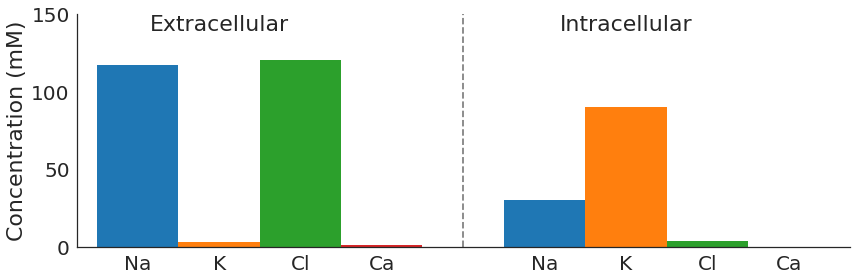

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=2)
%matplotlib inline

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Ionic concentrations (out, in, charge).
conc_Na = [117, 30, 1]
conc_K  = [3, 90, 1]
conc_Cl = [120, 4, -1]
conc_Ca = [1, 1e-4, 2]

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot concentrations.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))
colors = sns.color_palette(n_colors=4).as_hex()

## Plot.
for n, arr, color in zip(range(4), [conc_Na, conc_K, conc_Cl, conc_Ca], colors):
    ax.bar([n,n+5], arr[:-1], 1, color=color)
    
## Add information to plot.
ax.set(xlim=(-0.75, 8.75), xticks=[0,1,2,3,5,6,7,8], xticklabels=['Na','K','Cl','Ca']*2, 
       ylabel='Concentration (mM)', ylim=(0,150))
ax.vlines(4, 0, 150, linestyle='--', alpha=0.5)
ax.text(1, 150, 'Extracellular', ha='center', va='top', fontsize=22)
ax.text(6, 150, 'Intracellular', ha='center', va='top', fontsize=22)

sns.despine()
plt.tight_layout()

The relative distributions of each of these ions generate voltage, which acts as a **driving force** towards undoing this gradient. As such, there is a force on sodium and chloride ions to move into the cell, and a force for potassium ions to exit the cell. 

Why doesn't the gradient disappear? 

#### TODO : Provide better answer, relate it to electrochemical gradient and Nernst potentials. 

For each ion, there is an equilibrium point at which its electrical and chemical gradients are balanced, and the net flow of that ion is zero (i.e. equal flow into and out of the cell). This equilibrium point is known as the **equilibrium potential**, which is calculated by the **Nernst equation**:

>  $ E_{ion} = \frac{RT}{zF} log_{10} \frac{[X]_{out}}{[X]_{in}} $

where $R$ is the gas constant, $F$ is Faraday's constant, $z$ is the valence of the ion, and $[ion]$ denotes the concentration of the ion. At room temperature, this equation works out about to:

> $ E_{ion} = \frac{58}{z} log_{10} \frac{[X]_{out}}{[X]_{in}} $

Below we calculate and plot the Nernst potentials of these ions.

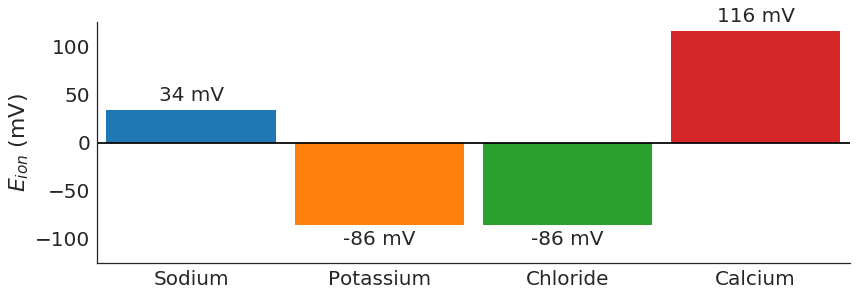

In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Compute and plot.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

def nernst_potential(ion_e, ion_i, z, c=58.):
    return (c / z) * np.log10(ion_e / ion_i)

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Iteratively plot and compute.
for n, arr in enumerate([conc_Na, conc_K, conc_Cl, conc_Ca]):
    
    ## Calculate Nernst potential.
    E = nernst_potential(*arr)
    
    ## Plot.
    ax.bar(n, E, 0.9)
    ax.text(n, E + np.sign(E) * 15, '%0.0f mV' %E, ha='center', va='center', fontsize=20)
    
## Add information to plot.
ax.hlines(0,-0.5,3.5)
ax.set(xlim=(-0.5,3.5), xticks=np.arange(4), xticklabels=['Sodium','Potassium','Chloride','Calcium'],
       ylim=(-125,125), ylabel=r'$E_{ion}$ (mV)')

sns.despine()
plt.tight_layout()

The Nernst potential of an ion describes the tendency of its effect on a neuron:
- **Sodium:** the electrochemical forces on sodium drive it into the neuron. As more positive sodium ions enter the cell, the resting potential of the neuron depolarizes (becomes more positive). 
- **Potassium:** the electrochemical forces on potassium drive it out of the neuron. As more positive potassium ions leave the cell, the resting potential of the neuron hyperpolarizes (becomes more negative). 
- **Chloride:** the electrochemical forces on potassium drive it into the neuron. As more negative chloride ions enter the cell, the resting potential of the neuron hyperpolarizes (becomes more negative). 


## The Goldman-Hodgkin-Katz Equation
Chemical gradients alone do not dictate equilibria for these ions. As charged particles, these ions interact with one another along electrical gradients as well. Thus, the permeability of each ion with respect to a neuron is not based solely on the concentrations of that particular ion. 

The **Goldman-Hodgkin-Katz equation** describes the resting potential of a neuron as a function of the concentrations of each of these ions:

> $ E_m = \frac{RT}{F} log_{10} \frac{p_{K^+}[K^+]_{out} \ + \ p_{Na^+}[Na^+]_{out} \ + \ p_{Cl^-}[Cl^-]_{in}}{p_{K^+}[K^+]_{in} \ + \ p_{Na^+}[Na^+]_{in} \ + \ p_{Cl^-}[Cl^-]_{out}} $

where we now introduce $p_{ion}$, which characterizes the relatively permeability of a particular ion. For a resting neuron, the relative permeabilities are something like: 

> $ p_{K^+} : p_{Na^+} : p_{Cl^-} = 1:0.025:0.45$

[It is worth pointing out then that the **leak channel** in a resting neuron is particularly driven by the leak of potassium ions.]

Using this information and the concentrations above, we can calculate the resting membrane potential, $E_m$:

In [3]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define paramteters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Sodium parameters.
Ce_Na = 117
Ci_Na = 30
p_Na = 0.025

## Potassium parameters.
Ce_K = 3
Ci_K = 90 
p_K = 1

## Chloride parameters.
Ce_Cl = 120
Ci_Cl = 4
p_Cl = 0.45

## Room temperature constant.
C = 58

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Compute membrane potential
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

Em = C * np.log10( (p_Na * Ce_Na + p_K * Ce_K + p_Cl * Ci_Cl) /
                   (p_Na * Ci_Na + p_K * Ci_K + p_Cl * Ce_Cl))

print('Em = %0.2f mV' %Em)

Em = -73.82 mV


The Goldman-Hodgkin-Katz equation also allows us to make predictions about the resting potential of the neuron if we make change to one of the ion concentrations, all else being equal. Below we demonstrate this by manipulating the extracellular concentration of the three ions. 

[**Note**: We manipulate extracellular ion concentrations as it is much less difficult experimentally than manipulating the intracellular ion concentrations!]

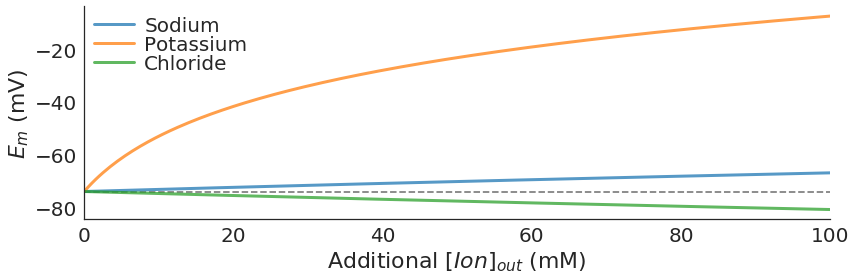

In [4]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Simulate manipulations.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Simulate concentration values and calculate voltage.
delta = np.linspace(0,100,201)

mV_Na = C * np.log10( (p_Na * (Ce_Na + delta) + p_K * Ce_K + p_Cl * Ci_Cl) /
                      (p_Na * Ci_Na + p_K * Ci_K + p_Cl * Ce_Cl))

mV_K = C * np.log10( (p_Na * Ce_Na + p_K * (Ce_K + delta) + p_Cl * Ci_Cl) /
                     (p_Na * Ci_Na + p_K * Ci_K + p_Cl * Ce_Cl))

mV_Cl = C * np.log10( (p_Na * Ce_Na + p_K * Ce_K + p_Cl * Ci_Cl) /
                      (p_Na * Ci_Na + p_K * Ci_K + p_Cl * (Ce_Cl + delta)))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Plot.
for mV, label in zip([mV_Na, mV_K, mV_Cl], ['Sodium','Potassium','Chloride']):
    ax.plot(delta[~np.isnan(mV)], mV[~np.isnan(mV)], linewidth=3, label=label, alpha=0.75)

ax.hlines(Em, delta.min(), delta.max(), linestyle='--', alpha=0.5)
ax.set(xlim=(delta.min(), delta.max()), 
       xlabel=r'Additional $[Ion]_{out}$ (mM)',  ylabel=r'$E_m$ (mV)')
ax.legend(loc=2, borderpad=0, labelspacing=0, handletextpad=0.5)

sns.despine()
plt.tight_layout()

#### TODO: Add description of why this occurs